In [22]:
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
import scipy.stats as st

In [13]:
data = pd.read_csv('Data/airline-passengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

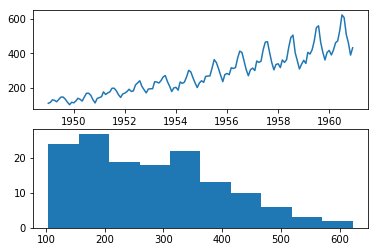

In [14]:
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(data)
# histogram
pyplot.subplot(212)
pyplot.hist(data)
pyplot.show()

Here, we can clearly see a couple of things.
* <b>Trend</b>: The data is trending upwards
* <b>Seasonality</b>: The data exhibits some recurring patterns every year
* <b>Variance</b>: The spread of data (amount of change) is increasing.

All of these factors contribute to <b>non-stationarity</b>, a quality that makes it difficult to model the data with both classical and sophisticated methods. However, we can transform the data a couple of different ways to work with it.

### Square Root Transform

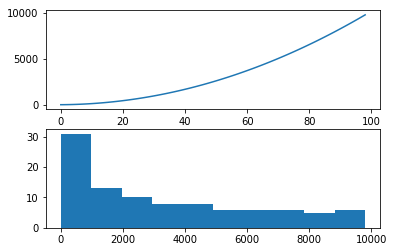

In [10]:
# contrive a quadratic time series
series = [i**2 for i in range(1,100)]
pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(series)

# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

This is an example of quadratic growth. The square root transform simply square roots the values to remove the trend.

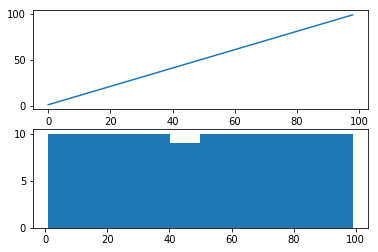

In [12]:
series_sqt = np.sqrt(series)
pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(series_sqt)

# histogram
pyplot.subplot(212)
pyplot.hist(series_sqt)
pyplot.show()

As you can see, the trend is perfectly removed. Let's try the same in our dataset; perhaps the data is also growing quadratically?

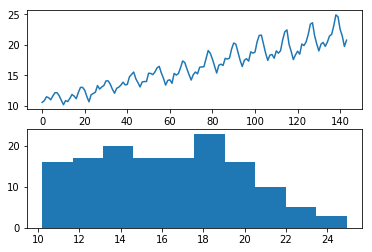

In [17]:
df = pd.DataFrame(data.values)
df.columns = ['passengers']
df['passengers'] = np.sqrt(df['passengers'])
pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(df['passengers'])

# histogram
pyplot.subplot(212)
pyplot.hist(df['passengers'])
pyplot.show()

We can see that the trend was reduced, but was not removed. The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.

### Log Transform

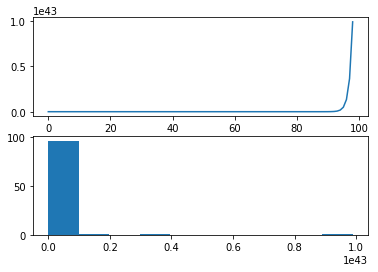

In [18]:
# contrive a quadratic time series
series = [np.exp(i) for i in range(1,100)]
pyplot.figure(1)

# line plot
pyplot.subplot(211)
pyplot.plot(series)

# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

Log transforms help nullify exponential trends.

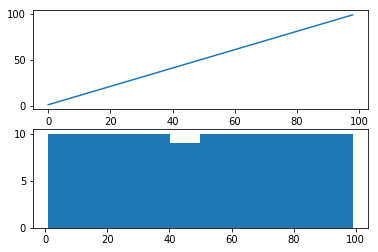

In [19]:
series_log = np.log(series)
# line plot
pyplot.subplot(211)
pyplot.plot(series_log)

# histogram
pyplot.subplot(212)
pyplot.hist(series_log)
pyplot.show()

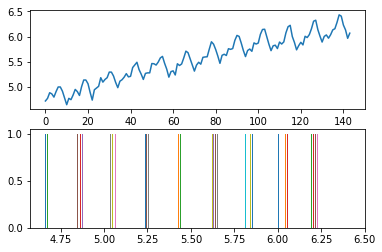

In [21]:
df = pd.DataFrame(data.values)
df.columns = ['passengers']
df['passengers'] = np.log(data.values)

# line plot
pyplot.subplot(211)
pyplot.plot(df)

# histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

Log transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero.
It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement. 

### Box-Cox Transform

The square root transform and log transform belong to a class of transforms called <b>power transforms</b>. The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and
select a best fit. It can be thought of as a power tool to iron out power-based change in
your time series. The resulting series may be more linear and the resulting distribution more
Gaussian or Uniform, depending on the underlying process that generated it. 

The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function
takes an argument, called <b>lambda</b>, that controls the type of transform to perform. Below are some common values for lambda:
* <b>-1.0:</b> reciprocal transform
* <b>-0.5:</b> reciprocal square root transform
* <b>0.0:</b> log transform
* <b>0.5:</b> square root transform
* <b>1.0:</b> no transform
* <b>None</b> let the function find a statistically tuned value

Lambda: 0.148023


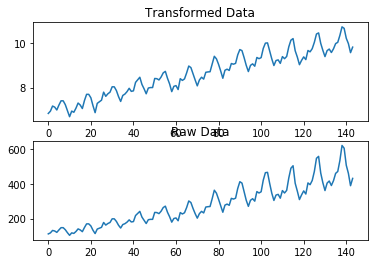

In [30]:
df = pd.DataFrame(data.values)
df.columns = ['passengers']
df['passengers'], lam = st.boxcox(df['passengers'])
print('Lambda: %f' % lam)

# line plot
pyplot.subplot(211)
pyplot.plot(df['passengers'])
pyplot.title('Transformed Data')

pyplot.subplot(212)
pyplot.plot(data.values)
pyplot.title('Raw Data')
pyplot.show()